In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# EXPLORATORY DATA ANALYSIS

In [46]:
# Importing Data

reviews = pd.read_csv('7282_1.csv')

In [47]:
# Data Info

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35912 entries, 0 to 35911
Data columns (total 19 columns):
address                 35912 non-null object
categories              35912 non-null object
city                    35912 non-null object
country                 35912 non-null object
latitude                35826 non-null float64
longitude               35826 non-null float64
name                    35912 non-null object
postalCode              35857 non-null object
province                35912 non-null object
reviews.date            35653 non-null object
reviews.dateAdded       35912 non-null object
reviews.doRecommend     0 non-null float64
reviews.id              0 non-null float64
reviews.rating          35050 non-null float64
reviews.text            35890 non-null object
reviews.title           34291 non-null object
reviews.userCity        16263 non-null object
reviews.username        35869 non-null object
reviews.userProvince    17518 non-null object
dtypes: float64(5), 

In [48]:
reviews.describe()

C:\Users\kulkarni\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,latitude,longitude,reviews.doRecommend,reviews.id,reviews.rating
count,35826.000000,35826.000000,0.0,0.0,35050.000000
mean,37.285008,-85.725758,NaN,NaN,3.776431
std,6.996544,33.062263,NaN,NaN,1.416195
min,-25.436750,-166.559040,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,63.877674,115.164407,NaN,NaN,10.000000


In [49]:
reviews.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [50]:
# First lets change the columns which are having '.' , which are of our interest

reviews = reviews.rename(index=str,columns={'reviews.rating':'reviewsrating','reviews.text':'reviewstext'})

In [51]:
# Cross check whether the names have changed

reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35912 entries, 0 to 35911
Data columns (total 19 columns):
address                 35912 non-null object
categories              35912 non-null object
city                    35912 non-null object
country                 35912 non-null object
latitude                35826 non-null float64
longitude               35826 non-null float64
name                    35912 non-null object
postalCode              35857 non-null object
province                35912 non-null object
reviews.date            35653 non-null object
reviews.dateAdded       35912 non-null object
reviews.doRecommend     0 non-null float64
reviews.id              0 non-null float64
reviewsrating           35050 non-null float64
reviewstext             35890 non-null object
reviews.title           34291 non-null object
reviews.userCity        16263 non-null object
reviews.username        35869 non-null object
reviews.userProvince    17518 non-null object
dtypes: float64(5), objec

In [52]:
# Let us look at some unique features in the datacolumn reviewsrating

reviews['reviewsrating'].unique()



array([  4. ,   5. ,   3. ,   1. ,   2. ,   0. ,   4.1,   nan,   4.9,
         4.8,   3.4,   2.4,   3.1,   3.2,   3.3,   9.6,  10. ,   8.3,
         8.8,   9.2,   7.5,   7.9,   7.1,   3.8,   5.8,   6.7,   6.3,
         4.2,   4.5,   3.9,   1.3,   4.3,   4.7,   2.8,   4.4,   1.5,
         4.6,   3.7,   5.4,   2.5,   6. ,   2.9,   7. ,   9.5])

In [53]:
# We can see that the values of the ratings are disperesed in between 0 and 10 along with nan
# Selecting reviews in between 1 and 5,including 1 and 5

reviews = reviews[reviews['reviewsrating']>0]



In [54]:
reviews = reviews[reviews['reviewsrating']<=5]

In [55]:
# We have tried to limit the rating in between 1  and 5, let us check if we have succeded

reviews['reviewsrating'].unique()

array([ 4. ,  5. ,  3. ,  1. ,  2. ,  4.1,  4.9,  4.8,  3.4,  2.4,  3.1,
        3.2,  3.3,  3.8,  4.2,  4.5,  3.9,  1.3,  4.3,  4.7,  2.8,  4.4,
        1.5,  4.6,  3.7,  2.5,  2.9])

In [56]:
# We can see that the reviews have been limited in between 1 and 5
# Converting the float ttype into integer

print(reviews['reviewsrating'])





0        4.0
1        5.0
2        5.0
3        5.0
4        5.0
5        5.0
6        4.0
7        4.0
8        3.0
9        4.0
10       4.0
11       3.0
12       4.0
13       4.0
14       4.0
15       4.0
16       4.0
17       4.0
18       4.0
19       1.0
20       1.0
21       5.0
22       4.0
23       5.0
24       5.0
25       5.0
26       4.0
27       4.0
28       4.0
29       4.0
        ... 
35880    5.0
35881    4.0
35882    5.0
35883    5.0
35884    5.0
35885    5.0
35886    5.0
35887    5.0
35888    4.0
35889    5.0
35890    5.0
35891    5.0
35892    5.0
35893    5.0
35894    5.0
35895    5.0
35896    5.0
35897    5.0
35898    5.0
35899    5.0
35900    5.0
35901    5.0
35902    1.0
35903    5.0
35904    5.0
35905    5.0
35906    5.0
35907    5.0
35908    5.0
35909    5.0
Name: reviewsrating, dtype: float64


In [57]:
reviews['reviewsrating'] = reviews['reviewsrating'].astype(int)

In [58]:
# Let us cross check if we have been successful in converting the float to int

reviews.head()



,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviewsrating,reviewstext,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [59]:
# We can see that we have been successful in converting the data type of reviewsrating to int

In [60]:
# Let us look at the value counts of the ratings

reviews['reviewsrating'].value_counts()

5    12671
4     9880
3     5747
1     3070
2     2988
Name: reviewsrating, dtype: int64

In [61]:
# Approximately, 33% of the reviews are 5 star
# We can say that we have a 30% chance of getting 5 star reviews

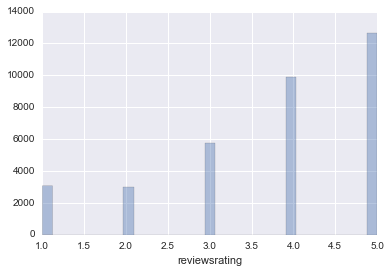

In [62]:
# lets plot the same

sns.distplot(reviews['reviewsrating'],kde=False)

In [63]:
# We can see the negavtively skewed distribtion of the ratings

In [64]:
# Lets us make a new dataframe for the required columns only

reviews_n = reviews[['reviewstext','reviewsrating']]

In [65]:
reviews_n.head()

,reviewstext,reviewsrating
0,Pleasant 10 min walk along the sea front to th...,4
1,Really lovely hotel. Stayed on the very top fl...,5
2,Ett mycket bra hotell. Det som drog ner betyge...,5
3,We stayed here for four nights in October. The...,5
4,We stayed here for four nights in October. The...,5


In [66]:
reviews_n.shape

(34356, 2)

In [67]:
# Dropping rows containing na values

reviews_n = reviews_n.dropna(axis = 0 ,how = 'any')

In [68]:
reviews_n.shape

(34334, 2)

In [69]:
34356-34334

22

In [70]:
# We are dropping only 22 values/rows of the original dataframe, which is of not much significance when you consider the number
# rows available for further processing

# MODELLING

In [71]:
# We will be applying the machine learning models
# Let us define the X and y parameters that we will be feeding to our model

X = reviews_n.reviewstext
y = reviews_n.reviewsrating
print(X.shape)
print(y.shape)



(34334,)
(34334,)


In [72]:
# Let us now split the data into train and test sets

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25750,)
(8584,)
(25750,)
(8584,)


# LET US USE MULTINOMIALNB FIRST

In [73]:
# Vectorizing our data
# Importing the Countvectorizer library

from sklearn.feature_extraction.text import CountVectorizer


In [74]:
# Initializing the counvectorizer

vect = CountVectorizer()

In [75]:
# Fit the countvectorizer to the data and transforming the data to document term matrix

X_train_dtm = vect.fit_transform(X_train)

In [76]:
#vect.get_feature_names()

In [77]:
X_train_dtm

<25750x27343 sparse matrix of type '<class 'numpy.int64'>'
	with 892572 stored elements in Compressed Sparse Row format>

In [78]:
# We can see that we have 27343 features

In [79]:
# Let us now transform the test data into document term matrix


X_test_dtm = vect.transform(X_test)
X_test_dtm



<8584x27343 sparse matrix of type '<class 'numpy.int64'>'
	with 294650 stored elements in Compressed Sparse Row format>

In [80]:
# Let us evaluate the model using MultinomialNB

from sklearn.naive_bayes import MultinomialNB

In [81]:
nb = MultinomialNB()

In [82]:
# Let us train the model using MultinomialNB

nb.fit(X_train_dtm,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [83]:
# Let us make the predictions for the test data

y_pred_class = nb.predict(X_test_dtm)

In [84]:
# Let us see the accuracy of the model
from sklearn import metrics

metrics.accuracy_score(y_test,y_pred_class)


0.5246971109040075

In [85]:
# We are getting an accuracy of 52.4%

In [86]:
# Print the confusion matrix:

metrics.confusion_matrix(y_test,y_pred_class)



array([[ 491,   76,  111,   37,   67],
       [ 209,  113,  263,   96,   61],
       [ 109,   80,  466,  495,  240],
       [  91,   43,  295,  991, 1064],
       [  54,   13,  141,  535, 2443]])

In [87]:
# We have used NaiveBayes to build our model

# Let us now try and use Support Vector machines to check if we can improve the accuracy


# WE HAVE USED COUNTVECTORIZER, LET US  USE TFIDFVECTORIZER

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector4 = TfidfVectorizer()

In [89]:
X_train2_dtm = vector4.fit_transform(X_train)

In [90]:
X_train2_dtm

<25750x27343 sparse matrix of type '<class 'numpy.float64'>'
	with 892572 stored elements in Compressed Sparse Row format>

In [91]:
X_test2_dtm = vector4.transform(X_test)

In [92]:
nb.fit(X_train2_dtm,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [93]:
y_pred_class_nb_tfidf = nb.predict(X_test2_dtm)

In [94]:

#from sklearn import metrics

metrics.accuracy_score(y_test,y_pred_class_nb_tfidf)

0.43569431500465983

In [95]:
# Inspite of using tf-idf vectorizer, we are getting a prediction accuracy of 43.56

In [96]:
# Print the confusion matrix:

metrics.confusion_matrix(y_test,y_pred_class_nb_tfidf)

array([[  66,    0,  112,  279,  325],
       [  11,    0,  101,  402,  228],
       [   5,    0,   76,  713,  596],
       [   3,    1,   39,  721, 1720],
       [   0,    1,   18,  290, 2877]])

# LET US TRY USING SVM

In [97]:
#from sklearn.svm import SVC

#svclf = SVC()

In [98]:
#svclf.fit(X_train_dtm,y_train)

In [99]:

# Let us make the predictions for the test data

#y_pred_class_svc = svclf.predict(X_test_dtm)

In [100]:
# Let us see the accuracy of the model
#from sklearn import metrics

#metrics.accuracy_score(y_test,y_pred_class_svc)


In [101]:
# By using SVC we can see that the prediction accuracy has dropped drastically from 52% to 37%

# LET US TRY USING LINEARSVC

In [102]:
# We saw that using SVM the accuracy dropped drastically
# Let us try using linear SVC

from sklearn.svm import LinearSVC


In [103]:
linclf = LinearSVC()

linclf.fit(X_train_dtm,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [104]:
y_pred_class_linsvc = linclf.predict(X_test_dtm)

In [105]:
# Checking the accuracy of the model

metrics.accuracy_score(y_test,y_pred_class_linsvc)

0.48567101584342964

In [106]:
# Print the confusion matrix:

metrics.confusion_matrix(y_test,y_pred_class_linsvc)



array([[ 381,  133,  127,   74,   67],
       [ 162,  193,  196,  128,   63],
       [  89,  161,  441,  432,  267],
       [  65,  106,  340,  965, 1008],
       [  63,   55,  154,  725, 2189]])

# MULTINOMIAL NB, STOPWORDS REMOVAL,CONSIDERING N-GRAMS

In [107]:
# Let us try removing the stopwords and see if it makes any difference,also let use ngrams 

vect1 = CountVectorizer(stop_words='english',ngram_range=(1,2))

In [108]:
X_train1_dtm = vect1.fit_transform(X_train)

In [109]:
X_train1_dtm

<25750x310830 sparse matrix of type '<class 'numpy.int64'>'
	with 1058784 stored elements in Compressed Sparse Row format>

In [110]:
X_test1_dtm = vect1.transform(X_test)
X_test1_dtm

<8584x310830 sparse matrix of type '<class 'numpy.int64'>'
	with 275820 stored elements in Compressed Sparse Row format>

In [111]:
# let us use MultinomialNB to train the model

nb.fit(X_train1_dtm,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [112]:
# Let us make predictions for the test data

y_pred_class1 = nb.predict(X_test1_dtm)

In [113]:
# Let us check the accuracy of the model

metrics.accuracy_score(y_test,y_pred_class1)

0.4993010251630941

In [114]:
# Print the confusion matrix:

metrics.confusion_matrix(y_test,y_pred_class1)

array([[ 365,   18,  165,  123,  111],
       [ 114,   36,  264,  217,  111],
       [  62,   19,  296,  659,  354],
       [  37,   14,  150,  964, 1319],
       [  22,    6,   54,  479, 2625]])

In [115]:
# We see that inspite of removing the stopwords and considering the n-grams the accuracy of the model decreases
# when we use NultinomialNB

# LINEAR SVC, REMOVAL OF STOPWORDS,CONSIDER N-GRAMS

In [116]:
# Let us try if the same thing happens when we use LinearSVC considering removal of stopwords and ngrams

linclf = LinearSVC()

linclf.fit(X_train1_dtm,y_train)



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [117]:
y_pred_class_linsvc1 = linclf.predict(X_test1_dtm)

In [118]:
# Let us check the accuracy of the model

metrics.accuracy_score(y_test,y_pred_class_linsvc1)

0.48497204100652375

In [119]:
# Print the confusion matrix:

metrics.confusion_matrix(y_test,y_pred_class_linsvc1)

array([[ 399,  120,  119,   82,   62],
       [ 157,  156,  230,  135,   64],
       [  84,  120,  474,  458,  254],
       [  59,   99,  311, 1006, 1009],
       [  42,   34,  175,  807, 2128]])

In [120]:
# We see that even after removal of stopwords and considering ngrams, the accuracy has not improved at all

# Instead of considering 5 classes let us consider building a classification model using only 2 ratings, to check whether we have
# any imporvement in accuracy

# BUILDING MODELS WITH 1 STAR AND 5 STAR REVIEWS

In [121]:
reviews_new = reviews_n[(reviews_n['reviewsrating']==1) | (reviews_n['reviewsrating'] == 5)]

In [122]:
reviews_new['reviewsrating'].unique()

array([5, 1], dtype=int64)

In [123]:
reviews_new.shape

(15731, 2)

In [124]:
reviews_new['reviewsrating'].value_counts()

5    12664
1     3067
Name: reviewsrating, dtype: int64

In [125]:
reviews_new1 = reviews_new.dropna()

In [126]:
reviews_new1.shape

(15731, 2)

In [127]:
# We will be applying the machine learning models
# Let us define the X and y parameters that we will be feeding to our model

X1 = reviews_new1.reviewstext
y1 = reviews_new1.reviewsrating
print(X1.shape)
print(y1.shape)


(15731,)
(15731,)


In [128]:
# Let us now split the data into train and test sets

from sklearn.cross_validation import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,random_state = 1)

print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(11798,)
(3933,)
(11798,)
(3933,)


# MULTINOMIAL NB W STOPWORDS AND W/O N-GRAMS

In [129]:
vector1 = CountVectorizer()

In [130]:
X_train1_dtm1 = vector1.fit_transform(X_train1)

In [131]:
X_train1_dtm1

<11798x17443 sparse matrix of type '<class 'numpy.int64'>'
	with 400998 stored elements in Compressed Sparse Row format>

In [132]:
X_test1_dtm1 = vector1.transform(X_test1)
X_test1_dtm1

<3933x17443 sparse matrix of type '<class 'numpy.int64'>'
	with 133040 stored elements in Compressed Sparse Row format>

In [133]:
# Fitting the model to the train data

nb.fit(X_train1_dtm1,y_train1)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [134]:
# Fitting model to test data for prediction

y_pred_class_mnb = nb.predict(X_test1_dtm1)

In [135]:
# Let us check the accuracy of the model

metrics.accuracy_score(y_test1,y_pred_class_mnb)

0.94101195016526828

In [136]:
# Print the confusion matrix:

metrics.confusion_matrix(y_test1,y_pred_class_mnb)

array([[ 675,   99],
       [ 133, 3026]])

# MULTINOMIAL NB W/O STOPWORDS AND W/ N-GRAMS

In [137]:
# Creating an instance

vector2 = CountVectorizer(stop_words='english',ngram_range=(1,3))

In [138]:
# Transforming the data

X_train1_dtm2 = vector2.fit_transform(X_train1)

In [139]:
X_train1_dtm2

<11798x369275 sparse matrix of type '<class 'numpy.int64'>'
	with 703587 stored elements in Compressed Sparse Row format>

In [140]:
#Transforming the test data

X_test1_dtm2 = vector2.transform(X_test1)

In [141]:
# Fitting the model to the train data

nb.fit(X_train1_dtm2,y_train1)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [142]:
# Fitting model to test data for prediction

y_pred_class_mnb1 = nb.predict(X_test1_dtm2)

In [143]:
# Let us check the accuracy of the model

metrics.accuracy_score(y_test1,y_pred_class_mnb1)

0.93389270277142133

In [144]:
# Print the confusion matrix:

metrics.confusion_matrix(y_test1,y_pred_class_mnb)

array([[ 675,   99],
       [ 133, 3026]])

In [145]:
# We see that the accuracy actually decreases if we remove the stopwords and use n-grams

# USING TFIDFVECTORIZER INSTEAD OF COUNTVECTORIZER

In [146]:
# Let us try and use tfidfvectorizer to see if we can increase the accuracy further

from sklearn.feature_extraction.text import TfidfVectorizer


In [147]:
vector3 = TfidfVectorizer()

In [148]:
X_train2_dtm2 = vector3.fit_transform(X_train1)


In [149]:
X_train2_dtm2

<11798x17443 sparse matrix of type '<class 'numpy.float64'>'
	with 400998 stored elements in Compressed Sparse Row format>

In [150]:
#Transforming the test data

X_test2_dtm2 = vector3.transform(X_test1)

In [151]:
# Fitting the model to the train data

nb.fit(X_train2_dtm2,y_train1)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [152]:
# Fitting model to test data for prediction

y_pred_class_mnb2 = nb.predict(X_test2_dtm2)

In [153]:
# Let us check the accuracy of the model

metrics.accuracy_score(y_test1,y_pred_class_mnb2)

0.8667683702008645

In [154]:
# Print the confusion matrix:

metrics.confusion_matrix(y_test1,y_pred_class_mnb2)

array([[ 260,  514],
       [  10, 3149]])

In [155]:
# If we use the tfidfvectorizer we see that the accuracy of the model decreases by almost 8%